In [1]:
from nltk.corpus import PlaintextCorpusReader
from gensim import corpora, models
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
sonnetsCorpus = PlaintextCorpusReader("prod", ".*\.txt")

In [3]:
print(len(sonnetsCorpus.fileids()))

482


In [4]:
def get_lists_of_words(corpus, **kwargs): 
    documents = [] # каждый документ у нас будет представлен как список слов
    for fileid in corpus.fileids(): # идем по каждому файлу
        
        # оставляем только слова и приводим их к нижнему регистру
        words = [token.lower() for token in corpus.words(fileid) if any([c for c in token if c.isalpha()])]
        
        # убираем слова длины меньше minlength - если такая задана
        if "minLen" in kwargs and kwargs["minLen"]: 
            words = [word for word in words if len(word) >= kwargs["minLen"]]
        
        # удаляем стоп-слова, если они опять же определены
        if "stopwords" in kwargs and kwargs["stopwords"]: 
            words = [word for word in words if word not in kwargs["stopwords"]]

        
        documents.append(words) # добавляем list of words
    
    return documents # возвращаем наши документы

In [5]:
sonnetsStopwords = nltk.corpus.stopwords.words('english') # загружаем список стоп-слов
sonnetsStopwords += ["thee", "thou", "thy"] # добавляем еще немного слов

In [6]:
sonnetsWords = get_lists_of_words(sonnetsCorpus, stopwords=sonnetsStopwords, minLen=3)

In [7]:
for i in range(0,10): # первые 2 документа
    print("document", str(i), sonnetsWords[i][0:5])

document 0 ['dna', 'testing', 'men', 'limburg', 'start']
document 1 ['dutch', 'financial', 'sector', 'watchdog', 'wants']
document 2 ['children', 'internet', 'savvy', 'think', 'dutch']
document 3 ['delft', 'university', 'refuses', 'listen', 'phd']
document 4 ['kids', 'per', 'class', 'dutch', 'primary']
document 5 ['dutch', 'health', 'council', 'calls', 'tough']
document 6 ['healthy', 'eating', 'costs', 'rise', 'sharply']
document 7 ['dutch', 'happy', 'sex', 'lives', 'women']
document 8 ['call', 'energy', 'drink', 'ban', 'amid']
document 9 ['swallowing', 'cell', 'battery', 'kill', 'child']


In [8]:
def get_lda_from_lists_of_words(lists_of_words, **kwargs):
    dictionary = corpora.Dictionary(lists_of_words) # делаем преобразование (терм -> число)
    corpus = [dictionary.doc2bow(text) for text in lists_of_words] 
    tfidf = models.TfidfModel(corpus) # считаем tf-idf для слов
    corpus_tfidf = tfidf[corpus] #
    kwargs["id2word"] = dictionary # устанавливаем словарь
    return models.LdaModel(corpus_tfidf, **kwargs) # возвращаем топики

In [9]:
%%time
#topic_model = gl.topic_model.create(docs, num_topics=15, num_iterations=3000)

sonnetsLda = get_lda_from_lists_of_words(sonnetsWords, num_topics=50, passes=20,iterations=300)
print(sonnetsLda)

LdaModel(num_terms=12107, num_topics=50, decay=0.5, chunksize=2000)
CPU times: user 4min 37s, sys: 2.32 s, total: 4min 39s
Wall time: 1min 34s


In [10]:
num_terms=10
num_topics = 50

In [11]:
for i in range(0, num_topics):
    terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]
    print("Top  terms for topic #", str(i), ": ", ", ".join(terms))  

Top  terms for topic # 0 :  boxed, abellio, rail, kroger, competitor, bid, kockelkoren, aggressive, bids, acm
Top  terms for topic # 1 :  poll, elections, closures, card, fgrt, malls, vote, credit, rossow, bankruptcies
Top  terms for topic # 2 :  site, toys, revenue, juniper, buying, asos, mcdonald, sites, analytics, bankruptcy
Top  terms for topic # 3 :  rila, baby, cornell, deer, mediamarkt, sent, academic, nbtc, substitute, culled
Top  terms for topic # 4 :  ebay, thieves, exports, kaya, agricultural, bikes, mexican, museums, tourists, mother
Top  terms for topic # 5 :  salt, laughing, saturated, smilecode, fat, pangolin, trending, magazines, smilecodes, paypal
Top  terms for topic # 6 :  film, rap, connections, olympics, hygienists, dentists, classes, class, dunkirk, archive
Top  terms for topic # 7 :  olympics, medals, winter, sven, bijl, joep, olympic, damage, confession, schoolchildren
Top  terms for topic # 8 :  denk, edwards, gamestop, hoekstra, sports, frimpong, volleyball, n

In [12]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

data = []
for i in range(0, num_topics):
    terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]    
    data.append({'name':'topic '+str(i),'words':", ".join(terms)})
reviews = pd.DataFrame(data=data)
reviews.columns = ['Topic','words']

In [13]:
reviews

,Topic,words
0,topic 0,"boxed, abellio, rail, kroger, competitor, bid, kockelkoren, aggressive, bids, acm"
1,topic 1,"poll, elections, closures, card, fgrt, malls, vote, credit, rossow, bankruptcies"
2,topic 2,"site, toys, revenue, juniper, buying, asos, mcdonald, sites, analytics, bankruptcy"
3,topic 3,"rila, baby, cornell, deer, mediamarkt, sent, academic, nbtc, substitute, culled"
4,topic 4,"ebay, thieves, exports, kaya, agricultural, bikes, mexican, museums, tourists, mother"
5,topic 5,"salt, laughing, saturated, smilecode, fat, pangolin, trending, magazines, smilecodes, paypal"
6,topic 6,"film, rap, connections, olympics, hygienists, dentists, classes, class, dunkirk, archive"
7,topic 7,"olympics, medals, winter, sven, bijl, joep, olympic, damage, confession, schoolchildren"
8,topic 8,"denk, edwards, gamestop, hoekstra, sports, frimpong, volleyball, noc, nsf, simons"
9,topic 9,"apple, features, chat, index, arkit, gender, ios, information, authorities, donor"


In [14]:
def graph_terms_to_topics(lda, num_terms=10):
    
    # создаем новый граф
    G = nx.Graph()
    plt.figure(figsize=(10,10))

    # создаем вершины
    for i in range(0, lda.num_topics):
        topicLabel = "topic "+str(i)
        terms = [val for val, term in lda.show_topic(i, num_terms)]                
        
        for term in terms:
            G.add_edge(topicLabel, term)
    
    pos = nx.spring_layout(G) # это один из способов визуализации графа
    
    # топики и названия термов будут иметь разный цвет в нашем случае
    g = G.subgraph([topic for topic, _ in pos.items() if "topic " in str(topic)])
    nx.draw_networkx_labels(g, pos,  font_color='r')
    g = G.subgraph([term for term, _ in pos.items() if "topic " not in str(term)])
    nx.draw_networkx_labels(g, pos)
    
    # рисуем
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), alpha=0.1)

    plt.axis('off')
    plt.show()


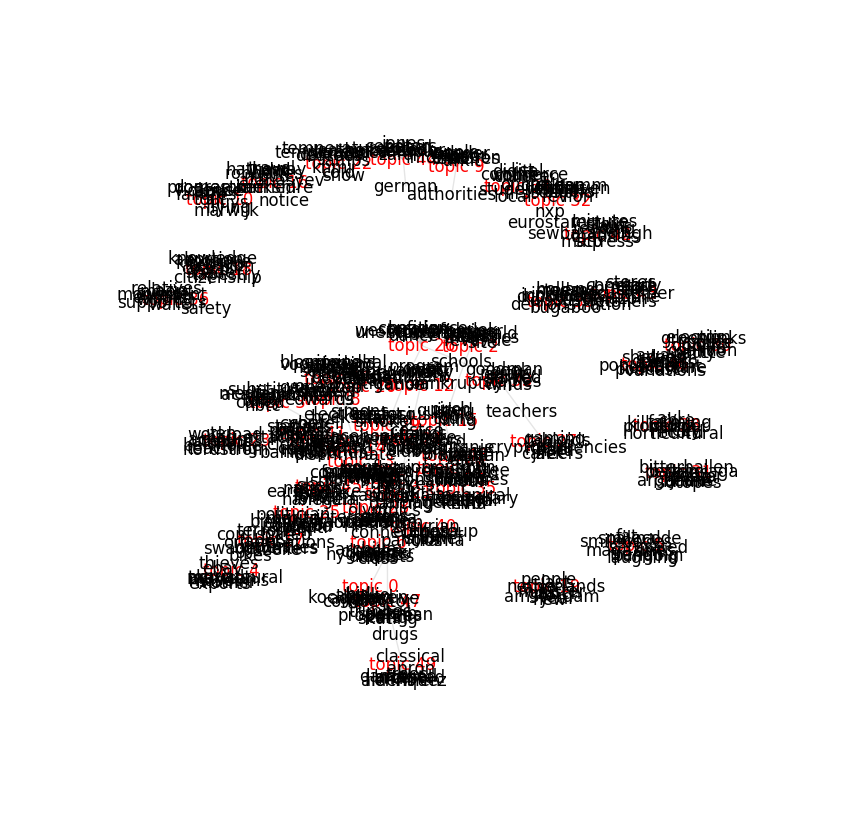

In [15]:
graph_terms_to_topics(sonnetsLda)

In [16]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from gensim.corpora import Dictionary

In [17]:
dictionary = corpora.Dictionary(sonnetsWords)
corpus = [dictionary.doc2bow(doc) for doc in sonnetsWords]
vis_data = gensimvis.prepare(sonnetsLda, corpus, dictionary)
pyLDAvis.display(vis_data)

In [69]:
import re
import numpy
punctuation_string = ', . ! ? '
def getTopicForQuery (question):
    temp = question.lower()    
    for i in range(len(punctuation_string)):
        temp = temp.replace(punctuation_string[i], ' ')

    words = re.findall(r'\w+', temp, flags = re.UNICODE | re.LOCALE)
    
    important_words = []
    important_words = filter(lambda x: x not in sonnetsStopwords, words)
    

    ques_vec = []
    ques_vec = dictionary.doc2bow(important_words)
    print(ques_vec)
    
    topic_vec = []
    topic_vec = sonnetsLda[ques_vec]
    print(topic_vec)

    word_count_array = numpy.empty((len(topic_vec), 2), dtype = numpy.object)
    for i in range(len(topic_vec)):
        word_count_array[i, 0] = topic_vec[i][0]
        word_count_array[i, 1] = topic_vec[i][1]

    idx = numpy.argsort(word_count_array[:, 1])
    idx = idx[::-1]
    word_count_array = word_count_array[idx]

    final = []
    final = sonnetsLda.print_topic(word_count_array[0, 0], 1)
    #print(word_count_array)

    question_topic = final.split('*') ## as format is like "probability * topic"


    return question_topic

In [70]:
test = "cambodia, kroger, hbc, dancing, foulkes, alibaba, hond, sinterklaas, storch, blog"
getTopicForQuery(test)

[(3398, 1), (4977, 1), (5935, 1), (5984, 1), (6175, 1), (6177, 1), (10232, 1), (10241, 1), (10245, 1), (10599, 1)]
[(21, 0.91090909090908867)]


['0.004', '"cambodia"']

In [71]:
print('text')

text


In [73]:
sonnetsLda.save('topics-prod.model')